<a href="https://colab.research.google.com/github/HamzaBahsir/NLP/blob/main/Neural_Network_models_In_NLP_ANNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Neural Networks (ANNs)**

Artificial Neural Networks (ANNs) are computational models inspired by the structure and function of biological neural networks in the human brain. They consist of interconnected layers of nodes (neurons) that process and transmit information. ANNs are widely used for tasks like classification, regression, and pattern recognition.

#### **Key Components of ANNs**:
1. **Input Layer**: Receives input data (e.g., features of a dataset).  
2. **Hidden Layers**: Intermediate layers that transform inputs using weights, biases, and activation functions.  
3. **Output Layer**: Produces the final prediction (e.g., class probabilities or continuous values).  
4. **Weights and Biases**: Learnable parameters that define the strength of connections between neurons.  
5. **Activation Functions**: Introduce non-linearity (e.g., sigmoid, ReLU) to enable complex learning.  
6. **Loss Function**: Measures the difference between predictions and actual values (e.g., Mean Squared Error).  
7. **Optimization**: Adjusts weights and biases using gradient descent to minimize the loss.

#### **How ANNs Learn**:
- **Forward Propagation**: Inputs are passed through the network to compute predictions.  
- **Backpropagation**: Errors are propagated backward to update weights and biases.  
- **Training**: Repeatedly adjusts parameters to improve prediction accuracy.


# **Objectives:**
We will
1. Build a basic feedforward neural network using [NumPy](https://numpy.org/) to understand the core mechanics of ANNs.
2. Learn how inputs are processed to generate predictions (forward propagation) and how errors are used to update model parameters (backpropagation).
3. Use the sigmoid function to introduce non-linearity and enable the network to learn complex patterns.
4. Use gradient descent to minimize the loss function (Mean Squared Error) and improve prediction accuracy.
5. Analyze the weights and biases of the hidden and output layers after training.
6. Use the trained model to predict outputs for new inputs and evaluate performance.
7. Develop a practical understanding of how ANNs work by implementing one from scratch.

## **Step 1: Create a Synthetic Dataset**

- We will use an Example which represents a simple XOR-like classification problem.

 <div style="text-align: left; margin-left: 30%;">
    <img src="https://www.build-electronic-circuits.com/wp-content/uploads/2022/09/Truth-table-XOR-gate.png" width="20%">
 </div>

- **Input (`X`)**:  
  A 4x2 matrix representing 4 samples with 2 features each.
  Example:  
  
  \begin{bmatrix}
  0 & 0 \\
  0 & 1 \\
  1 & 0 \\
  1 & 1
  \end{bmatrix}

- **Output (`y`)**:  
  A 4x1 vector of binary labels (0 or 1).
  Example:
  \begin{bmatrix}
  0 & 1 & 1 & 0
  \end{bmatrix}
  


In [ ]:
import numpy as np
# Step 1: Create a synthetic dataset
# Input features (4 samples, 2 features each)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Output labels (binary classification)
y = np.array([[0], [1], [1], [0]])

## **Step 2: Initialize Weights and Biases**

---
### **General Rules for Neural Network Parameter Sizing**

#### **1. Weight Matrix Size**  
- For a weight matrix connecting layer \( L-1 \) (previous) to layer \( L \) (current):  
  $$ \text{Weight Matrix Size} = (m, n) \quad \text{or} \quad \mathbf{W}^{(L)} \in \mathbb{R}^{m \times n} $$  
  Where:  
  - \( m \): Number of neurons in layer \( L-1 \) (previous layer).  
  - \( n \): Number of neurons in layer \( L \) (current layer).  

- **Example**:  
 - Input layer (\( L-1 \)): 2 neurons → Hidden layer (\( L \)): 4 neurons  
  $$ \mathbf{W}^{(1)} = \begin{bmatrix} w_{11} & w_{12} & w_{13} & w_{14} \\ w_{21} & w_{22} & w_{23} & w_{24} \end{bmatrix} \quad (\text{Shape: } 2 \times 4) $$  
 - Hidden layer (\( L-1 \)): 4 neurons → Output layer (\( L \)): 1 neuron  
  $$ \mathbf{W}^{(2)} = \begin{bmatrix} w_{11} \\ w_{21} \\ w_{31} \\ w_{41} \end{bmatrix} \quad (\text{Shape: } 4 \times 1) $$  


#### **2. Bias Vector Size**  
For a layer \( L \) with \( n \) neurons:  
$$ \text{Bias Vector Size} = (1, n) \quad \text{or} \quad \mathbf{b}^{(L)} \in \mathbb{R}^{1 \times n} $$  

**Example**:  
- Hidden layer (\( L=1 \)) with 4 neurons:  
  $$ \mathbf{b}^{(1)} = \begin{bmatrix} b_1 & b_2 & b_3 & b_4 \end{bmatrix} \quad (\text{Shape: } 1 \times 4) $$  
- Output layer (\( L=2 \)) with 1 neuron:  
  $$ \mathbf{b}^{(2)} = \begin{bmatrix} b_1 \end{bmatrix} \quad (\text{Shape: } 1 \times 1) $$  

---
- So, keeping in view the above rules, the initialization of our network parameters will be done as follows:
  - **Weights (`W1`, `W2`)**:  
    - `W1`: Randomly initialized 2x4 matrix connecting the input layer to the hidden layer.  
    - `W2`: Randomly initialized 4x1 matrix connecting the hidden layer to the output layer.  
    - Initialized using `np.random.randn` to break symmetry and start training.  

  - **Biases (`b1`, `b2`)**:  
    - `b1`: Zero-initialized 1x4 vector for the hidden layer.  
    - `b2`: Zero-initialized 1x1 vector for the output layer.  
    - Initialized using `np.zeros`

  - **`np.random.seed(42)`**:  
    - Sets a random seed for reproducibility (ensures consistent results across runs).



In [ ]:
# Step 2: Initialize weights and biases
np.random.seed(42)  # For reproducibility
input_size = 2
hidden_size = 4
output_size = 1

# Weights and biases for hidden layer
W1 = np.random.randn(input_size, hidden_size)  # 2x4 matrix
b1 = np.zeros((1, hidden_size))               # 1x4 vector

# Weights and biases for output layer
W2 = np.random.randn(hidden_size, output_size)  # 4x1 matrix
b2 = np.zeros((1, output_size))                 # 1x1 vector

In [ ]:
print("\nWeights and Biases of Hidden Layer:")
print("Weights (W1):\n", W1)
print("Biases (b1):\n", b1)

print("\nWeights and Biases of Output Layer:")
print("Weights (W2):\n", W2)
print("Biases (b2):\n", b2)


Weights and Biases of Hidden Layer:
Weights (W1):
 [[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]]
Biases (b1):
 [[0. 0. 0. 0.]]

Weights and Biases of Output Layer:
Weights (W2):
 [[-0.46947439]
 [ 0.54256004]
 [-0.46341769]
 [-0.46572975]]
Biases (b2):
 [[0.]]


## **Step 3: Define Activation Functions**

- **`sigmoid(x)`**:  
  - Computes the sigmoid activation function, which squashes input values between 0 and 1.  
  $$ \sigma(x) = \frac{1}{1 + e^{-x}} $$
  - Used to introduce non-linearity in the hidden and output layers.  



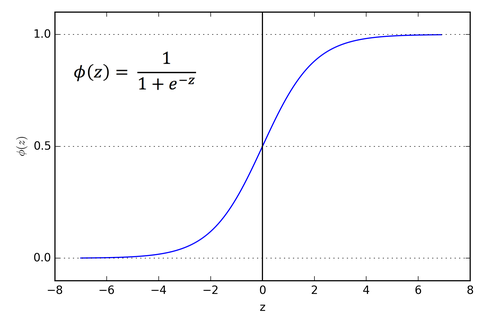

- **`sigmoid_derivative(x)`**:  
  - Computes the derivative of the sigmoid function.  
  $$ \sigma'(x) = \sigma(x) \cdot (1 - \sigma(x)) $$
  - Used during backpropagation to calculate gradients for weight updates.



In [ ]:
# Step 3: Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

## **Step 4: Training Loop**

### **Forward Propagation**:
1. **Hidden Layer**:  
   - Computes
   $$ \text{hidden_input} = \mathbf{X} \cdot \mathbf{W}^{(1)} + \mathbf{b}^{(1)} $$  
   - Applies sigmoid activation: $$ \text{hidden_output} = \sigma(\text{hidden_input}) $$  

2. **Output Layer**:  
   - Computes $$ \text{output_input} = \text{hidden_output} \cdot \mathbf{W2} + \mathbf{b}^{(2)} $$  
   - Applies sigmoid activation: $$ \text{output} = \sigma(\text{output_input}) $$  

### **Backpropagation**:
1. **Output Layer Error**:  
   - Computes $$ \text{output_error} = y - \text{output} $$  
   - Calculates gradient $$ \text{output_delta} = \text{output_error} \cdot \sigma'(\text{output}) $$  

2. **Hidden Layer Error**:  
   - Propagates error backward: $$ \text{hidden_error} = \text{output_delta} \cdot \mathbf{(W}^{(1)})^{T} $$
   - Calculates gradient $$ \text{hidden_delta} = \text{hidden_error} \cdot \sigma'(\text{hidden_output}) $$  

3. **Update Weights and Biases**:  
   - Updates `W2` and `b2` using the output layer gradient:  
     $$ \mathbf{W}^{(2)} \leftarrow \mathbf{W}^{(2)} + (\text{hidden\_output}^{T} \cdot \text{output\_delta}) \cdot \text{learning\_rate} $$

     $$ \mathbf{b}^{(2)} \leftarrow \mathbf{b}^{(2)} + \left( \sum_{i=1}^{N} \text{output\_delta}^{(i)} \right) \cdot \text{learning\_rate} $$

   - Updates `W1` and `b1` using the hidden layer gradient:
     $$ W1 \leftarrow W1 + (X^T \cdot \text{hidden\_delta}) \cdot \text{learning\_rate} $$  

     $$ b1 \leftarrow b1 + \left( \sum_{i=1}^{N} \text{hidden\_delta}^{(i)} \right) \cdot \text{learning\_rate} $$
   - Learning rate (`lr=0.1`) controls the step size during gradient descent.


4. **Loss Calculation**:  
   - Computes Mean Squared Error (MSE): $$ \text{loss} = \frac{1}{N} \sum (y - \text{output})^2 $$
   - Printed every 1000 epochs to monitor training progress.

In [ ]:
# Step 4: Training loop
learning_rate = 0.1
epochs = 10000

for epoch in range(epochs):
    # Forward propagation
    # Hidden layer
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)
    # print("Hidden output: ", hidden_output)

    # Output layer
    output_input = np.dot(hidden_output, W2) + b2
    # print("output_input: ", output_input)
    output = sigmoid(output_input)
    # print("output: ", output)

    # Backpropagation
    # Output layer error
    output_error = y - output
    # print("output_error: ", output_error)
    output_delta = output_error * sigmoid_derivative(output)
    # print("output_error * sigmoid_derivative(output): ", output_delta)

    # Hidden layer error
    hidden_error = output_delta.dot(W2.T)    # .T computes the transpose
    # print("hidden_error: ", hidden_error)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)
    # print("hidden_error * sigmoid_derivative(hidden_output): ", hidden_delta)

    # Update weights and biases
    W2 += hidden_output.T.dot(output_delta) * learning_rate
    b2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    W1 += X.T.dot(hidden_delta) * learning_rate
    b1 += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean(np.square(y - output))
        print(f"Epoch {epoch}, Loss: {loss}")

Epoch 0, Loss: 0.27269962695015243
Epoch 1000, Loss: 0.24517680677415543
Epoch 2000, Loss: 0.2121914679257422
Epoch 3000, Loss: 0.1500164652127733
Epoch 4000, Loss: 0.05689260155583444
Epoch 5000, Loss: 0.020860899763211704
Epoch 6000, Loss: 0.010661328409347429
Epoch 7000, Loss: 0.00666797856144906
Epoch 8000, Loss: 0.004676819608655819
Epoch 9000, Loss: 0.0035230597240602456


## **Step 5: Inspect Weights and Biases**

- **Hidden Layer (`W1`, `b1`)**:  
  - `W1`: Learned weights connecting input features to the hidden layer.  
  - `b1`: Learned biases for the hidden layer neurons.  

- **Output Layer (`W2`, `b2`)**:  
  - `W2`: Learned weights connecting hidden layer to the output neuron.  
  - `b2`: Learned bias for the output neuron.  

These parameters define the trained model’s behavior.

In [ ]:
# Step 5: Inspect weights and biases
print("\nWeights and Biases of Hidden Layer:")
print("Weights (W1):\n", W1)
print("Biases (b1):\n", b1)

print("\nWeights and Biases of Output Layer:")
print("Weights (W2):\n", W2)
print("Biases (b2):\n", b2)


Weights and Biases of Hidden Layer:
Weights (W1):
 [[ 5.22755803  0.98737756  0.68211489  6.01168822]
 [-3.1665061  -3.99987946  2.91162331  5.80896286]]
Biases (b1):
 [[ 1.24807889  0.50309079 -2.1493624  -2.05331446]]

Weights and Biases of Output Layer:
Weights (W2):
 [[-6.57317657]
 [ 4.64035978]
 [-3.9460209 ]
 [ 8.04555054]]
Biases (b2):
 [[-1.53888967]]


## **Step 6: Make Predictions**

- **Forward Pass**:  
  Recomputes the hidden layer and output layer activations using the trained weights and biases.  
- **Output**:  
  Returns probabilities between 0 and 1. Values close to 0 → Class 0; close to 1 → Class 1.  


In [ ]:
# Step 6: Make predictions
hidden_output = sigmoid(np.dot(X, W1) + b1)
predictions = sigmoid(np.dot(hidden_output, W2) + b2)
print("\nPredictions:\n", predictions)


Predictions:
 [[0.03728262]
 [0.9491687 ]
 [0.94483812]
 [0.06421791]]


## **Key Concepts**

1. **Activation Function**: Sigmoid introduces non-linearity for learning complex patterns.  
2. **Forward Propagation**: Computes predictions using current weights/biases.  
3. **Backpropagation**: Updates weights/biases by propagating errors backward.  
4. **Loss Function**: Measures prediction accuracy (MSE used here).  
5. **Learning Rate**: Controls the size of weight updates during training.

If you want to explore this in further detail, consult this notebook as well: [Detailed Implementation of ANNs](https://github.com/nmarincic/machineintelligence/blob/master/11.%20Building%20a%20Neural%20Network%20using%20Matrices%20-%20Step%20by%20Step.ipynb)